# `redwine_quality.ipynb`

# Red Wine Quality

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import warnings
warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('./winequality-red.csv')

Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
                           mean        std      min        max
fixed acidity          8.319637   1.741096  4.60000   15.90000
volatile acidity       0.527821   0.179060  0.12000    1.58000
citric acid            0.270976   0.194801  0.00000    1.00000
residual sugar         2.538806   1.409928  0.90000   15.50000
chlorides              0.087467   0.047065  0.01200    0.61100
free sulfur dioxide   15.874922  10.460157  1.00000   72.00000
total sulfur dioxide  46.467792  32.895324  6.00000  289.00000
density                0.996747   0.001887  0.99007    1.00369
pH                     3.311113   0.154386  2.74000    4.01000
sulphates              0.658149   0.169507  0.33000    2.00000
alcohol               10.422983   1.065668  8.40000   14.90000
quality                5.636023   0.807569  3.00000 

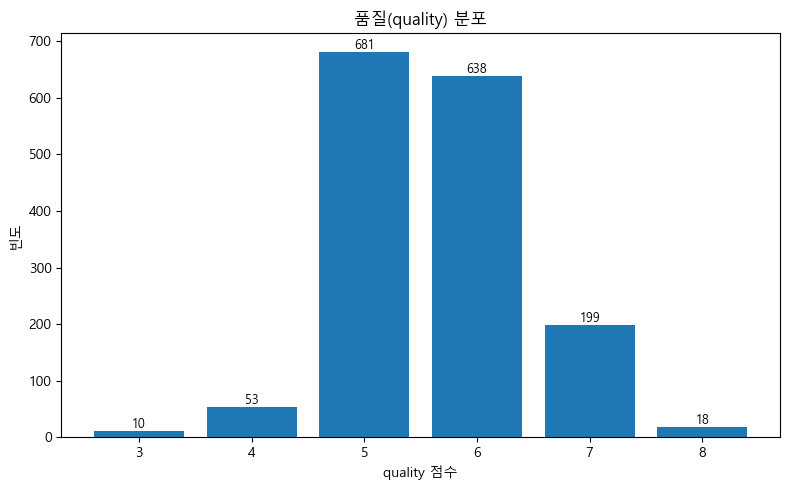

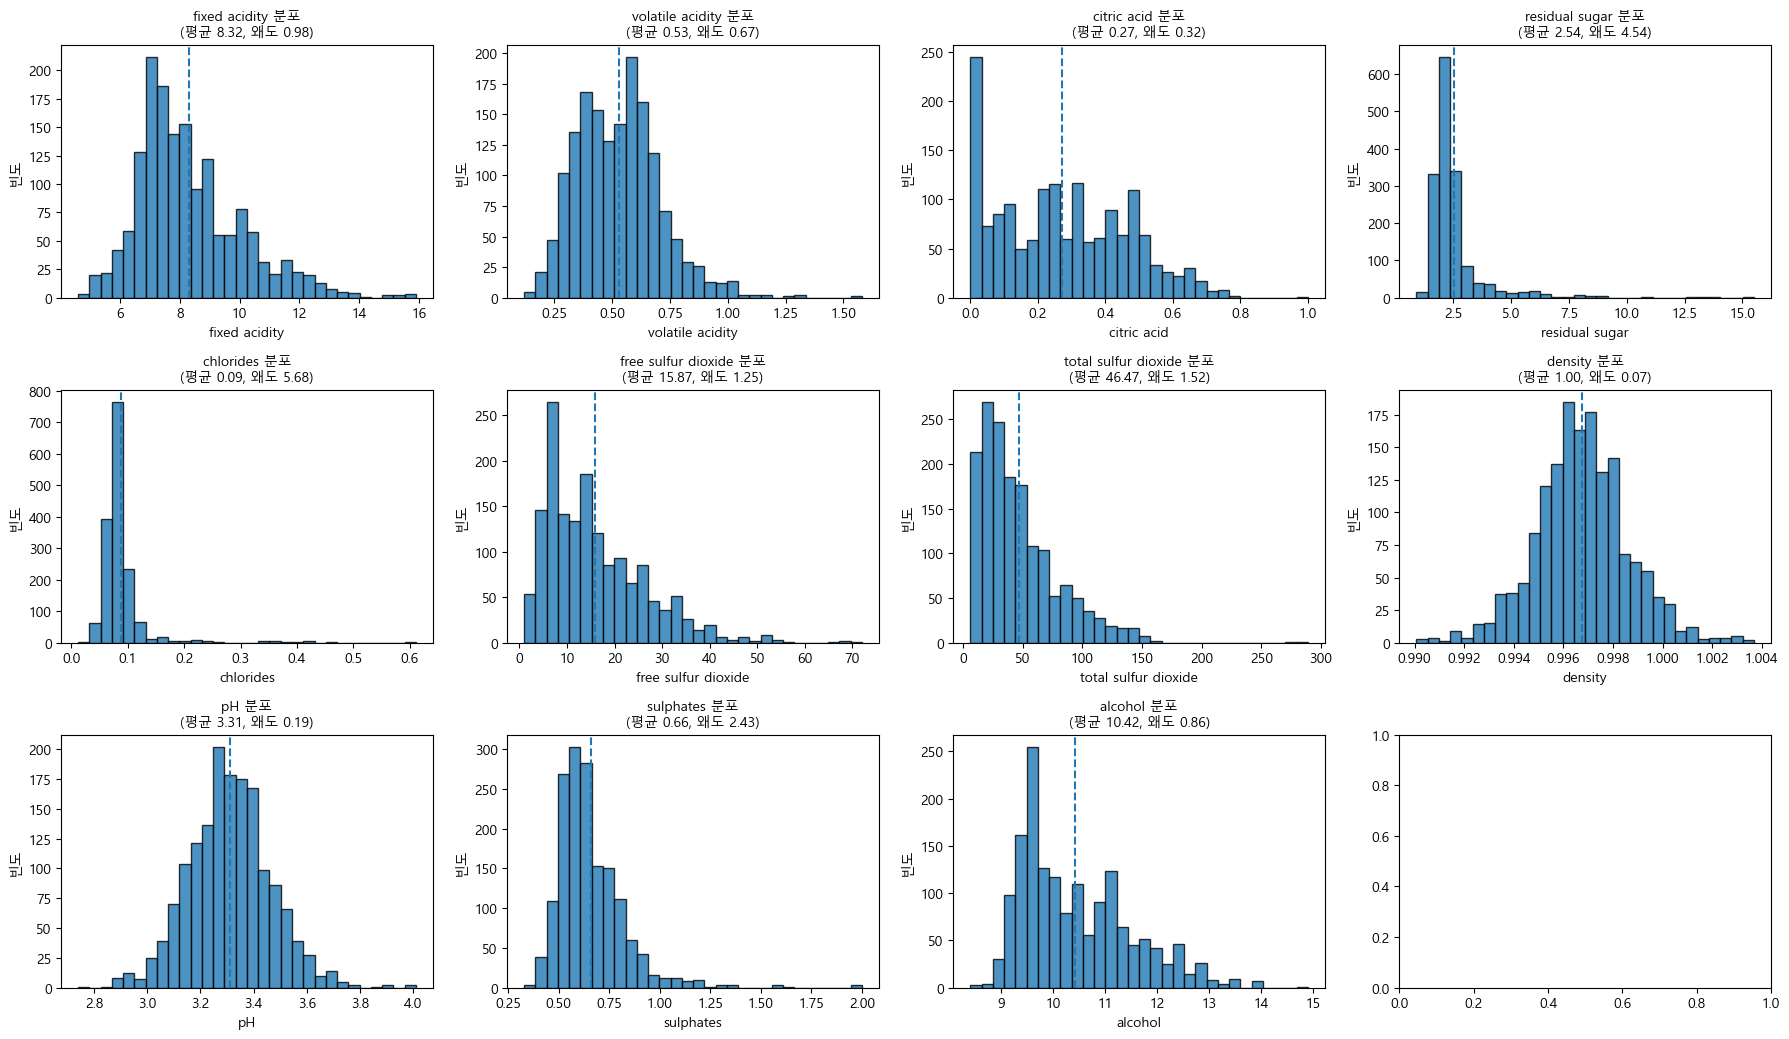

In [2]:
# ÌäπÏÑ± ÏÇ¥Ìé¥Î≥¥Í∏∞ (ÌíàÏßà Î∂ÑÌè¨, ÌûàÏä§ÌÜ†Í∑∏Îû®)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ===== 1) Îç∞Ïù¥ÌÑ∞ Î°úÎìú =====
# , ÎòêÎäî ; Î™®Îëê ÏûêÎèô ÌåêÎ≥Ñ
csv_path = "winequality-red.csv"
df = pd.read_csv(csv_path, sep=None, engine="python")

# Ïª¨Îüº ÌôïÏù∏ (Ï∞∏Í≥†Ïö©)
print("Columns:", list(df.columns))
print(df.describe().T[['mean','std','min','max']])

# ===== 2) ÌíàÏßà(quality) Î∂ÑÌè¨ =====
quality_counts = df['quality'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(quality_counts.index.astype(str), quality_counts.values)
plt.title("ÌíàÏßà(quality) Î∂ÑÌè¨")
plt.xlabel("quality Ï†êÏàò")
plt.ylabel("ÎπàÎèÑ")
# ÎßâÎåÄ ÏúÑÏóê Í∞í ÌëúÏãú
for x, y in zip(quality_counts.index.astype(str), quality_counts.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

# ===== 3) Í∞Å ÌäπÏÑ± ÌûàÏä§ÌÜ†Í∑∏Îû® =====
# 'quality'Î•º Ï†úÏô∏Ìïú ÏàòÏπòÌòï ÌäπÏÑ±Îì§ ÏûêÎèô ÏÑ†ÌÉù
feature_cols = [c for c in df.columns if c != 'quality']

n = len(feature_cols)
cols = 4
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(4*cols + 2, 3.5*rows))
axes = np.array(axes).reshape(rows, cols)  # 2D Î≥¥Ïû•

for i, col in enumerate(feature_cols):
    r, c = divmod(i, cols)
    ax = axes[r, c]
    series = df[col].dropna()
    ax.hist(series, bins=30, edgecolor='black', alpha=0.8)
    ax.set_title(f"{col} Î∂ÑÌè¨\n(ÌèâÍ∑† {series.mean():.2f}, ÏôúÎèÑ {series.skew():.2f})", fontsize=10)
    ax.set_xlabel(col)
    ax.set_ylabel("ÎπàÎèÑ")
    # ÌèâÍ∑†ÏÑ†
    ax.axvline(series.mean(), linestyle="--")
    
# ÎÇ®Îäî Îπà Ï∂ï Ïà®Í∏∞Í∏∞
for j in range(n, rows*cols):
    r,

plt.tight_layout()
plt.show()

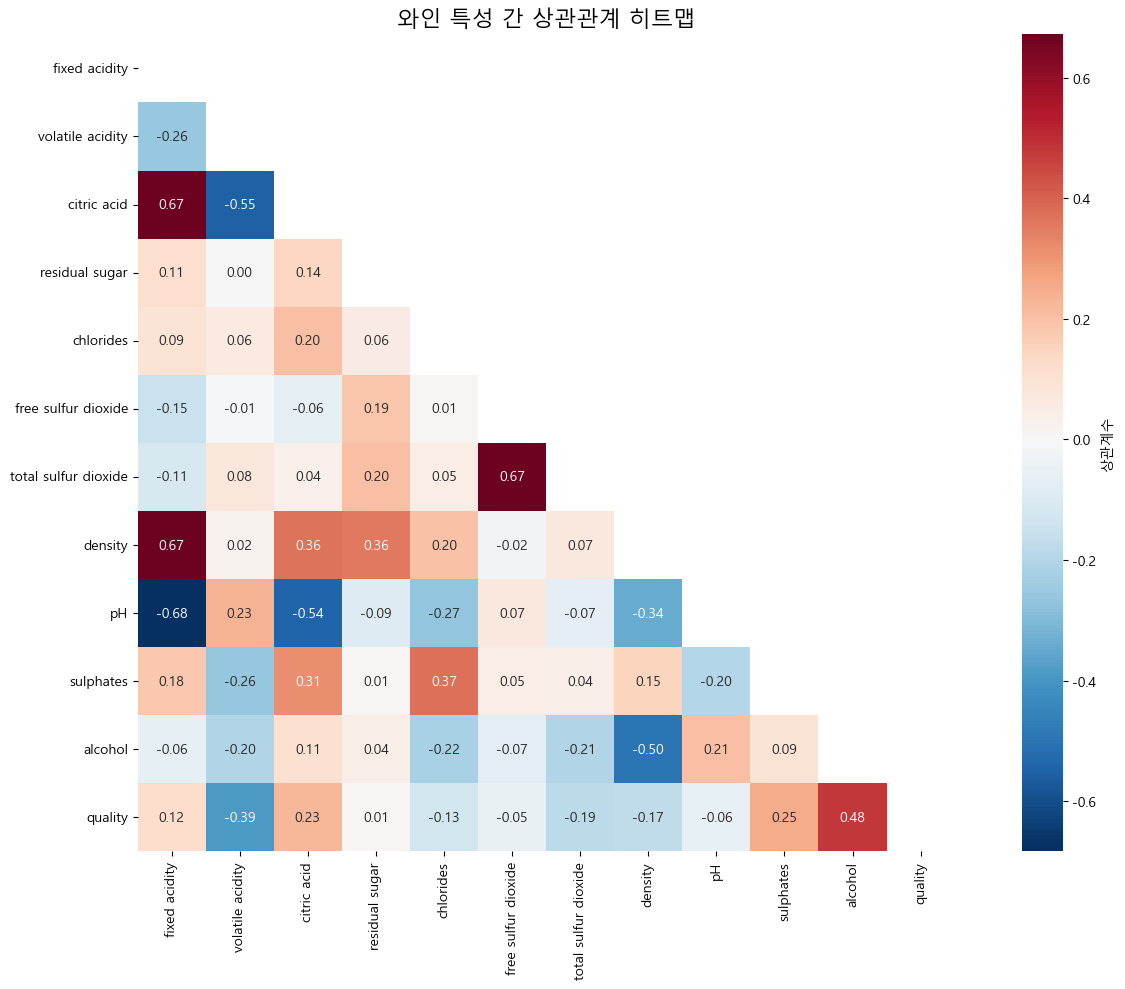

=== ÌíàÏßà(quality)Í≥ºÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ===
alcohol: 0.476 (ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ)
volatile acidity: -0.391 (ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ)
sulphates: 0.251 (ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ)
citric acid: 0.226 (ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ)
total sulfur dioxide: -0.185 (ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ)
density: -0.175 (ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ)
chlorides: -0.129 (ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ)
fixed acidity: 0.124 (ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ)
pH: -0.058 (ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ)
free sulfur dioxide: -0.051 (ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ)
residual sugar: 0.014 (ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ)


C:\Users\amy\AppData\Local\Temp\ipykernel_13564\371200268.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, ax=ax, palette='Set2')
C:\Users\amy\AppData\Local\Temp\ipykernel_13564\371200268.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, ax=ax, palette='Set2')
C:\Users\amy\AppData\Local\Temp\ipykernel_13564\371200268.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, ax=ax, palette='Set2')


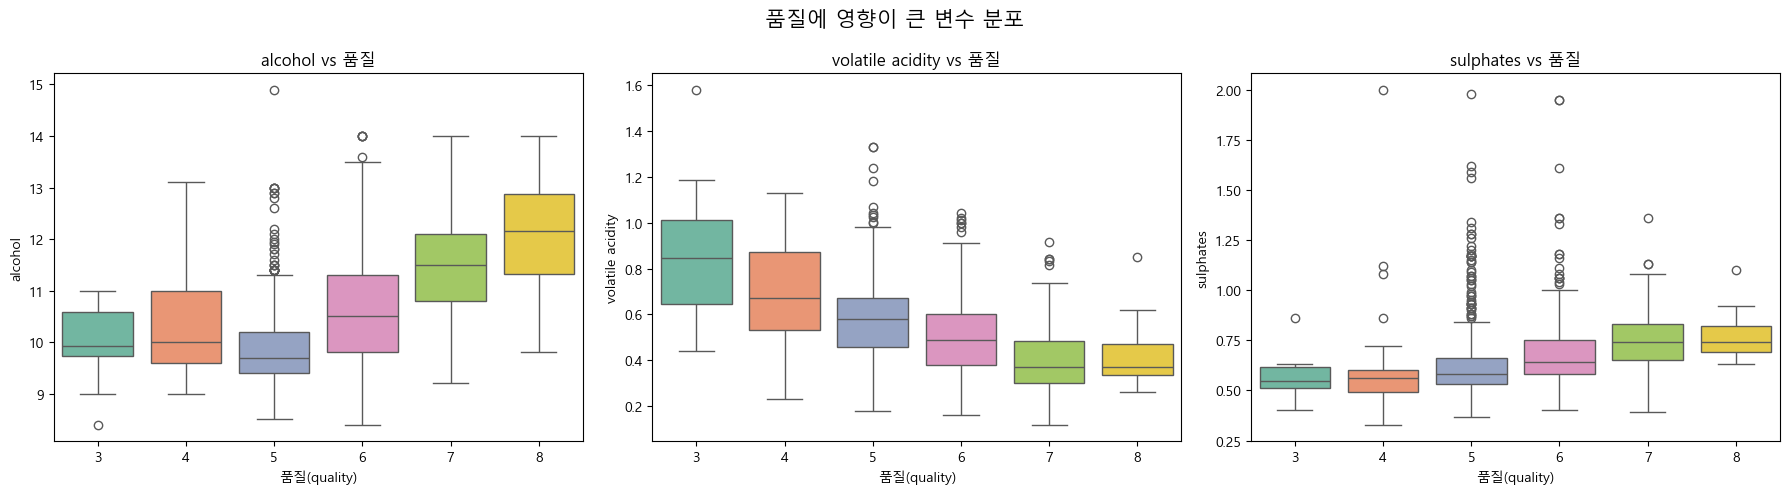

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===== 1) Îç∞Ïù¥ÌÑ∞ Î°úÎìú =====
csv_path = "winequality-red.csv"
df = pd.read_csv(csv_path, sep=None, engine="python")

# ===== 2) ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ =====
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr(numeric_only=True)

# ÏÉÅÏÇºÍ∞Å ÎßàÏä§ÌÅ¨
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f',
            center=0, cmap='RdBu_r', square=True,
            cbar_kws={'label': 'ÏÉÅÍ¥ÄÍ≥ÑÏàò'})
plt.title('ÏôÄÏù∏ ÌäπÏÑ± Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ', fontsize=16)
plt.tight_layout()
plt.show()

# ===== 3) ÌíàÏßàÍ≥ºÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù =====
print("=== ÌíàÏßà(quality)Í≥ºÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ===")
quality_corr = correlation_matrix['quality'].sort_values(key=abs, ascending=False)
for var, corr in quality_corr.items():
    if var != 'quality':
        direction = "ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ" if corr > 0 else "ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ"
        print(f"{var}: {corr:.3f} ({direction})")

# ===== 4) ÌíàÏßàÏóê Í∞ÄÏû• ÏòÅÌñ• ÌÅ∞ ÏÉÅÏúÑ Î≥ÄÏàòÎì§ ÏãúÍ∞ÅÌôî =====
# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ï†àÎåìÍ∞í Í∏∞Ï§Ä ÏÉÅÏúÑ 3Í∞ú Î≥ÄÏàò ÏÑ†ÌÉù
top_features = quality_corr.abs().drop('quality').head(3).index.tolist()

fig, axes = plt.subplots(1, len(top_features), figsize=(6*len(top_features), 5))

for i, col in enumerate(top_features):
    ax = axes[i]
    # boxplot: ÌíàÏßà Í∑∏Î£πÎ≥Ñ Î≥ÄÏàò Î∂ÑÌè¨
    sns.boxplot(x='quality', y=col, data=df, ax=ax, palette='Set2')
    ax.set_title(f"{col} vs ÌíàÏßà", fontsize=12)
    ax.set_xlabel("ÌíàÏßà(quality)")
    ax.set_ylabel(col)

plt.suptitle("ÌíàÏßàÏóê ÏòÅÌñ•Ïù¥ ÌÅ∞ Î≥ÄÏàò Î∂ÑÌè¨", fontsize=15)
plt.tight_layout()
plt.show()


In [15]:
# ÌõàÎ†® ÌÖåÏä§Ìä∏ ÏÖã ÎÇòÎàÑÍ∏∞

from sklearn.model_selection import train_test_split

y = df['quality']
X = df.drop(['quality'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(f'ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: {len(X_train)}')
print(f'ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: {len(X_test)}')


ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: 1199
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: 400


In [ ]:
# KNN ÌöåÍ∑ÄÎ°ú ÏôÄÏù∏ ÌíàÏßà ÏòàÏ∏° 

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

k_scores = []

for k in range(1, 21):
    knr = KNeighborsRegressor(n_neighbors=k)
    knr.fit(X_train_scaled, y_train)
    knr_train_score = knr.score(X_train_scaled, y_train)
    knr_test_score = knr.score(X_test_scaled, y_test)
    k_scores.append((k, knr_test_score, knr_train_score))
    
max_k, max_test_score, max_train_score = max(k_scores, key=lambda x: x[1])
print(f'ÏµúÍ≥†Ï†êÏàò k: {max_k}, Ï†êÏàò: {max_test_score:.3f}')

b_knr = KNeighborsRegressor(n_neighbors=max_k)  # ÎÇòÏ§ëÏóê Ïì∞Í∏∞

ÏµúÍ≥†Ï†êÏàò k: 14, Ï†êÏàò: 0.350


In [25]:
# ÏÑ†ÌòïÌöåÍ∑ÄÎ°ú ÏôÄÏù∏ ÌíàÏßà ÏòàÏ∏° (ÌõàÎ†®ÏÖã/ÌÖåÏä§Ìä∏ÏÖãÏùò Ï†êÏàòÎ•º ÎÜíÏó¨Î≥¥Ïûê)

from sklearn.linear_model import LinearRegression

lr_basic = LinearRegression()
lr_basic.fit(X_train, y_train)

lr_basic_score = lr_basic.score(X_test, y_test)

print(f'Í∏∞Î≥∏ LR Score(R^2): {lr_basic_score:.4f} (Train: {lr_basic.score(X_train, y_train)})')

# ÏòàÏ∏° Ïã§Ï†ú Í∞í Í≥ÑÏÇ∞(ÏãúÍ∞ÅÌôî)
lr_basic_pred = lr_basic.predict(X_test)

Í∏∞Î≥∏ LR Score(R^2): 0.3723 (Train: 0.354852874520566)


In [26]:
from sklearn.preprocessing import PolynomialFeatures
# Îã§Ìï≠ ÌöåÍ∑Ä (Ïä§ÏºÄÏùºÎßÅ ÌïÑÏöî)
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

poly_results = []
for degree in [2, 3, 4]:
    print(f'\n{degree}Ï∞®Ïàò Îã§Ìï≠Ïãù ÌäπÏÑ± Ïã§Ìóò')
    # Îã§Ìï≠Ïãù ÌäπÏÑ± ÏÉùÏÑ±
    
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    print(f'ÏõêÎûò ÌäπÏÑ± Ïàò: {X_train_scaled.shape[1]}')
    print(f'Îã§Ìï≠Ïãù ÌäπÏÑ± Ïàò: {X_train_poly.shape[1]}')

    # Î™®Îç∏ ÌõàÎ†®
    lr_poly = LinearRegression()
    lr_poly.fit(X_train_poly, y_train)

    # ÏÑ±Îä• ÌèâÍ∞Ä
    poly_score = lr_poly.score(X_test_poly, y_test)
    poly_results.append((degree, poly_score))
    print(f'Îã§Ìï≠Ïãù Ï∞®ÏàòÎ≥Ñ Ï†êÏàò: {degree} -> {poly_score:.4f}')

    # Overfitting Ï≤¥ÌÅ¨Î•º ÏúÑÌïú ÏÑ±Îä• ÌôïÏù∏
    train_score = lr_poly.score(X_train_poly, y_train)
    print(f'ÌõàÎ†® -> {train_score:.4f}')
    print(f'Í≥ºÏ†ÅÌï©Ï†ïÎèÑ -> {train_score - poly_score:.4f}')


best_degree, best_score = max(poly_results, key=lambda x: x[1])
print(best_degree, best_score)

# ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ Îã§Ïãú ÌõàÎ†®
poly_best = PolynomialFeatures(degree=best_degree)
X_train_poly_best = poly_best.fit_transform(X_train_scaled)
X_test_poly_best = poly_best.transform(X_test_scaled)

lr_poly_best = LinearRegression()
lr_poly_best.fit(X_train_poly_best, y_train)
lr_poly_best_score = lr_poly_best.score(X_test_poly_best, y_test)
lr_poly_best_pred = lr_poly_best.predict(X_test_poly_best)


2Ï∞®Ïàò Îã§Ìï≠Ïãù ÌäπÏÑ± Ïã§Ìóò
ÏõêÎûò ÌäπÏÑ± Ïàò: 11
Îã§Ìï≠Ïãù ÌäπÏÑ± Ïàò: 77
Îã§Ìï≠Ïãù Ï∞®ÏàòÎ≥Ñ Ï†êÏàò: 2 -> 0.3745
ÌõàÎ†® -> 0.4389
Í≥ºÏ†ÅÌï©Ï†ïÎèÑ -> 0.0644

3Ï∞®Ïàò Îã§Ìï≠Ïãù ÌäπÏÑ± Ïã§Ìóò
ÏõêÎûò ÌäπÏÑ± Ïàò: 11
Îã§Ìï≠Ïãù ÌäπÏÑ± Ïàò: 363
Îã§Ìï≠Ïãù Ï∞®ÏàòÎ≥Ñ Ï†êÏàò: 3 -> -0.3482
ÌõàÎ†® -> 0.6528
Í≥ºÏ†ÅÌï©Ï†ïÎèÑ -> 1.0010

4Ï∞®Ïàò Îã§Ìï≠Ïãù ÌäπÏÑ± Ïã§Ìóò
ÏõêÎûò ÌäπÏÑ± Ïàò: 11
Îã§Ìï≠Ïãù ÌäπÏÑ± Ïàò: 1364
Îã§Ìï≠Ïãù Ï∞®ÏàòÎ≥Ñ Ï†êÏàò: 4 -> -3185.0570
ÌõàÎ†® -> 1.0000
Í≥ºÏ†ÅÌï©Ï†ïÎèÑ -> 3186.0570
2 0.37445416528963726


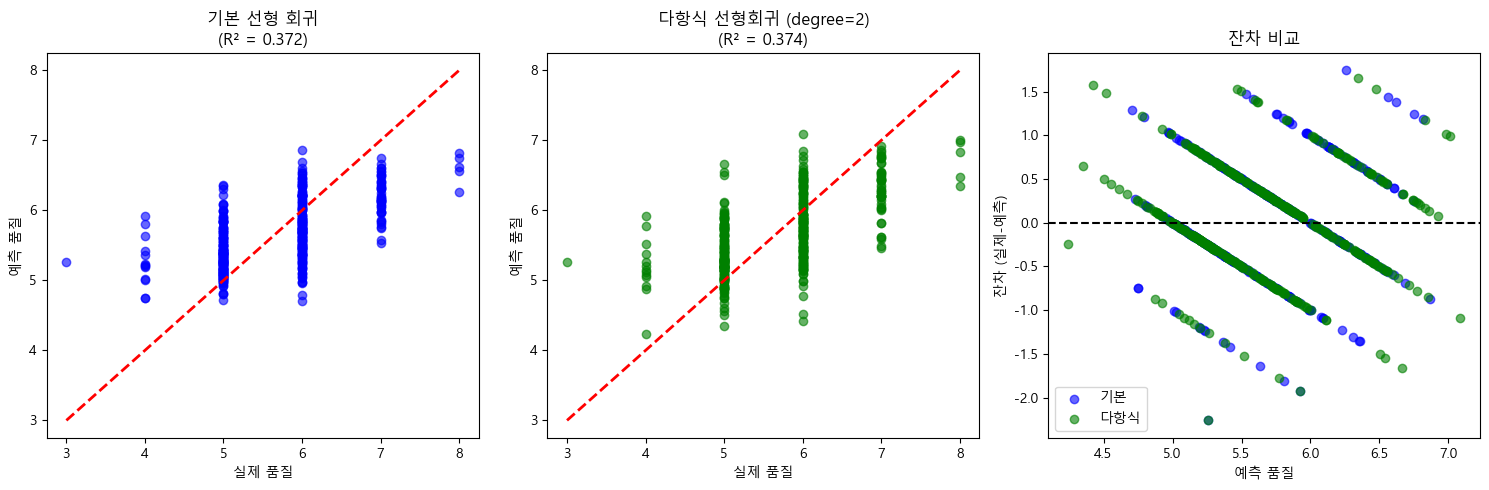

ÏÑ±Îä• Ìñ•ÏÉÅ: 0.0022 (0.6%)


In [27]:
# Ridge, Lasso Î°ú Í∑úÏ†úÌï¥Í∞ÄÎ©∞ ÏòàÏ∏° 

# ÏòàÏ∏° vs Ïã§Ï†úÍ∞í ÎπÑÍµê
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, lr_basic_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Ïã§Ï†ú ÌíàÏßà')
plt.ylabel('ÏòàÏ∏° ÌíàÏßà')
plt.title(f'Í∏∞Î≥∏ ÏÑ†Ìòï ÌöåÍ∑Ä\n(R¬≤ = {lr_basic_score:.3f})')

plt.subplot(1, 3, 2)
plt.scatter(y_test, lr_poly_best_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Ïã§Ï†ú ÌíàÏßà')
plt.ylabel('ÏòàÏ∏° ÌíàÏßà')
plt.title(f'Îã§Ìï≠Ïãù ÏÑ†ÌòïÌöåÍ∑Ä (degree={best_degree})\n(R¬≤ = {lr_poly_best_score:.3f})')

plt.subplot(1, 3, 3)
# ÏûîÏ∞® ÎπÑÍµê
residuals_basic = y_test - lr_basic_pred
residuals_poly = y_test - lr_poly_best_pred

plt.scatter(lr_basic_pred, residuals_basic, alpha=0.6, color='blue', label='Í∏∞Î≥∏')
plt.scatter(lr_poly_best_pred, residuals_poly, alpha=0.6, color='green', label='Îã§Ìï≠Ïãù')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('ÏòàÏ∏° ÌíàÏßà')
plt.ylabel('ÏûîÏ∞® (Ïã§Ï†ú-ÏòàÏ∏°)')
plt.title('ÏûîÏ∞® ÎπÑÍµê')
plt.legend()

plt.tight_layout()
plt.show()

improvement = lr_poly_best_score - lr_basic_score
print(f"ÏÑ±Îä• Ìñ•ÏÉÅ: {improvement:.4f} ({improvement/lr_basic_score*100:.1f}%)")


In [28]:
from sklearn.linear_model import Ridge, Lasso

# Îã§Ìï≠Ïãù ÌäπÏÑ±Ïóê ÎåÄÌï¥ Ridge/Lasso Ï†ÅÏö© (ÏïûÏÑú ÎßåÎì† ÏµúÏ†Å degree ÏÇ¨Ïö©)
print(f"Îã§Ìï≠Ïãù ÌäπÏÑ± (degree={best_degree}) Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©:")
print(f"ÌäπÏÑ± Ïàò: {X_train_poly_best.shape[1]}Í∞ú")

# Ridge ÌöåÍ∑Ä (Îã§Ìï≠Ïãù ÌäπÏÑ±Ïóê ÎåÄÌï¥)
alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
ridge_scores_poly = []
ridge_train_scores = []

print("\nRidge ÌöåÍ∑Ä (Îã§Ìï≠Ïãù ÌäπÏÑ±):")
for alpha in alphas:
    ridge_poly = Ridge(alpha=alpha)
    ridge_poly.fit(X_train_poly_best, y_train)
    
    # ÌÖåÏä§Ìä∏ ÏÑ±Îä•
    ridge_score = ridge_poly.score(X_test_poly_best, y_test)
    ridge_scores_poly.append(ridge_score)
    
    # ÌõàÎ†® ÏÑ±Îä• (Í≥ºÏ†ÅÌï© Ï≤¥ÌÅ¨Ïö©)
    ridge_train_score = ridge_poly.score(X_train_poly_best, y_train)
    ridge_train_scores.append(ridge_train_score)
    
    print(f"  alpha={alpha:7.3f}: ÌÖåÏä§Ìä∏={ridge_score:.4f}, ÌõàÎ†®={ridge_train_score:.4f}, Ï∞®Ïù¥={ridge_train_score-ridge_score:.4f}")

best_ridge_alpha_poly = alphas[np.argmax(ridge_scores_poly)]
best_ridge_score_poly = max(ridge_scores_poly)

# Lasso ÌöåÍ∑Ä (Îã§Ìï≠Ïãù ÌäπÏÑ±Ïóê ÎåÄÌï¥)
lasso_scores_poly = []
lasso_train_scores = []

print("\nLasso ÌöåÍ∑Ä (Îã§Ìï≠Ïãù ÌäπÏÑ±):")
for alpha in alphas:
    lasso_poly = Lasso(alpha=alpha, max_iter=2000)
    lasso_poly.fit(X_train_poly_best, y_train)
    
    # ÌÖåÏä§Ìä∏ ÏÑ±Îä•
    lasso_score = lasso_poly.score(X_test_poly_best, y_test)
    lasso_scores_poly.append(lasso_score)
    
    # ÌõàÎ†® ÏÑ±Îä•
    lasso_train_score = lasso_poly.score(X_train_poly_best, y_train)
    lasso_train_scores.append(lasso_train_score)
    
    print(f"  alpha={alpha:7.3f}: ÌÖåÏä§Ìä∏={lasso_score:.4f}, ÌõàÎ†®={lasso_train_score:.4f}, Ï∞®Ïù¥={lasso_train_score-lasso_score:.4f}")

best_lasso_alpha_poly = alphas[np.argmax(lasso_scores_poly)]
best_lasso_score_poly = max(lasso_scores_poly)

print(f"\nüèÜ ÏµúÏ†Å ÏÑ±Îä•:")
print(f"Ridge (Îã§Ìï≠Ïãù) - alpha: {best_ridge_alpha_poly}, Score: {best_ridge_score_poly:.4f}")
print(f"Lasso (Îã§Ìï≠Ïãù) - alpha: {best_lasso_alpha_poly}, Score: {best_lasso_score_poly:.4f}")


Îã§Ìï≠Ïãù ÌäπÏÑ± (degree=2) Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©:
ÌäπÏÑ± Ïàò: 78Í∞ú

Ridge ÌöåÍ∑Ä (Îã§Ìï≠Ïãù ÌäπÏÑ±):
  alpha=  0.001: ÌÖåÏä§Ìä∏=0.3745, ÌõàÎ†®=0.4389, Ï∞®Ïù¥=0.0644
  alpha=  0.010: ÌÖåÏä§Ìä∏=0.3745, ÌõàÎ†®=0.4389, Ï∞®Ïù¥=0.0644
  alpha=  0.100: ÌÖåÏä§Ìä∏=0.3745, ÌõàÎ†®=0.4389, Ï∞®Ïù¥=0.0643
  alpha=  1.000: ÌÖåÏä§Ìä∏=0.3753, ÌõàÎ†®=0.4388, Ï∞®Ïù¥=0.0635
  alpha= 10.000: ÌÖåÏä§Ìä∏=0.3799, ÌõàÎ†®=0.4374, Ï∞®Ïù¥=0.0575
  alpha=100.000: ÌÖåÏä§Ìä∏=0.3929, ÌõàÎ†®=0.4258, Ï∞®Ïù¥=0.0329
  alpha=1000.000: ÌÖåÏä§Ìä∏=0.3496, ÌõàÎ†®=0.3498, Ï∞®Ïù¥=0.0002

Lasso ÌöåÍ∑Ä (Îã§Ìï≠Ïãù ÌäπÏÑ±):
  alpha=  0.001: ÌÖåÏä§Ìä∏=0.3835, ÌõàÎ†®=0.4362, Ï∞®Ïù¥=0.0527
  alpha=  0.010: ÌÖåÏä§Ìä∏=0.3904, ÌõàÎ†®=0.4104, Ï∞®Ïù¥=0.0200
  alpha=  0.100: ÌÖåÏä§Ìä∏=0.3090, ÌõàÎ†®=0.3057, Ï∞®Ïù¥=-0.0033
  alpha=  1.000: ÌÖåÏä§Ìä∏=-0.0020, ÌõàÎ†®=0.0000, Ï∞®Ïù¥=0.0020
  alpha= 10.000: ÌÖåÏä§Ìä∏=-0.0020, ÌõàÎ†®=0.0000, Ï∞®Ïù¥=0.0020
  alpha=100.000: ÌÖåÏä§Ìä∏=-0.0020, ÌõàÎ†®=0.0000, Ï∞®Ïù¥=0.0020
  alpha=1000.000: ÌÖåÏä§Ìä∏=-0.

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

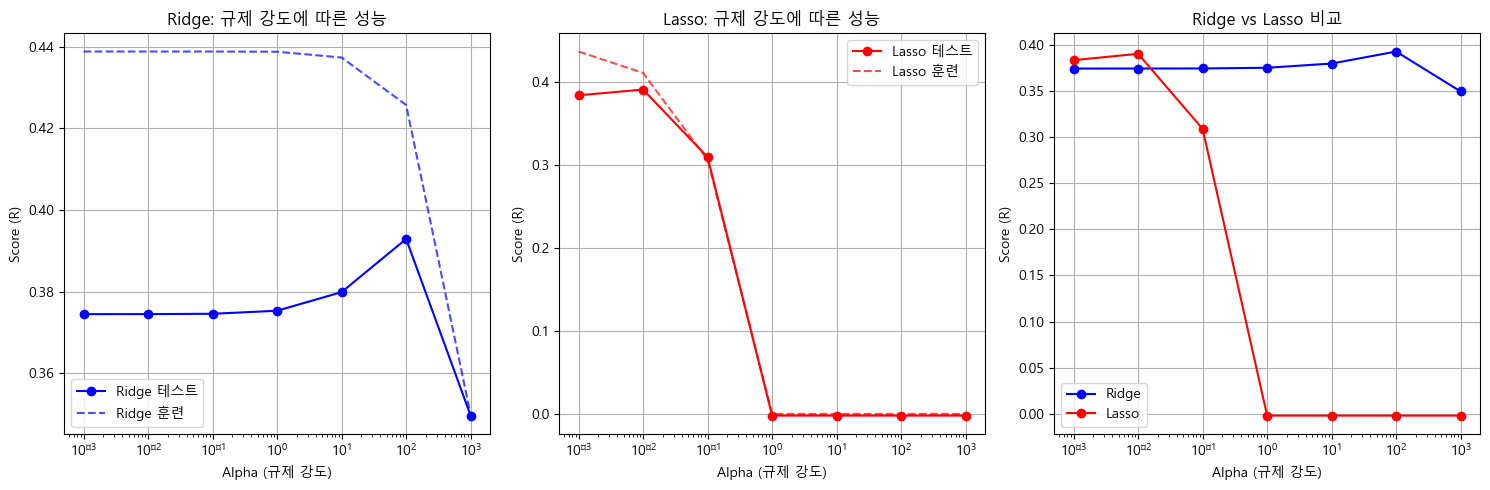

In [29]:
# Alpha Í∞íÏóê Îî∞Î•∏ ÏÑ±Îä• ÎπÑÍµê (ÌõàÎ†® vs ÌÖåÏä§Ìä∏)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(alphas, ridge_scores_poly, 'bo-', label='Ridge ÌÖåÏä§Ìä∏')
plt.plot(alphas, ridge_train_scores, 'b--', alpha=0.7, label='Ridge ÌõàÎ†®')
plt.xlabel('Alpha (Í∑úÏ†ú Í∞ïÎèÑ)')
plt.ylabel('Score (R)')
plt.title('Ridge: Í∑úÏ†ú Í∞ïÎèÑÏóê Îî∞Î•∏ ÏÑ±Îä•')
plt.xscale('log')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(alphas, lasso_scores_poly, 'ro-', label='Lasso ÌÖåÏä§Ìä∏')
plt.plot(alphas, lasso_train_scores, 'r--', alpha=0.7, label='Lasso ÌõàÎ†®')
plt.xlabel('Alpha (Í∑úÏ†ú Í∞ïÎèÑ)')
plt.ylabel('Score (R)')
plt.title('Lasso: Í∑úÏ†ú Í∞ïÎèÑÏóê Îî∞Î•∏ ÏÑ±Îä•')
plt.xscale('log')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(alphas, ridge_scores_poly, 'bo-', label='Ridge')
plt.plot(alphas, lasso_scores_poly, 'ro-', label='Lasso')
plt.xlabel('Alpha (Í∑úÏ†ú Í∞ïÎèÑ)')
plt.ylabel('Score (R)')
plt.title('Ridge vs Lasso ÎπÑÍµê')
plt.xscale('log')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
